In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
credit = pd.read_csv("credit_card.csv")

In [3]:
print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [4]:
df_credit = credit.drop(["Customer Key", "Sl_No"], axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

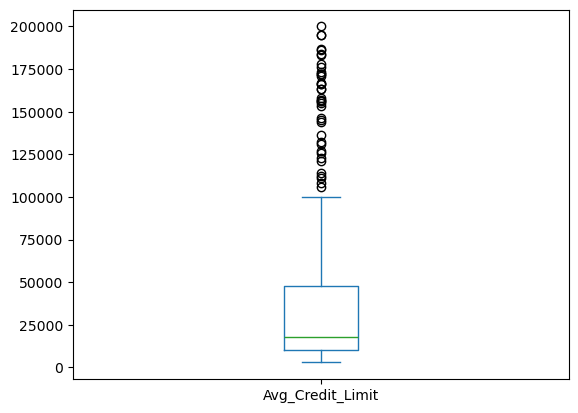

In [5]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


<Axes: >

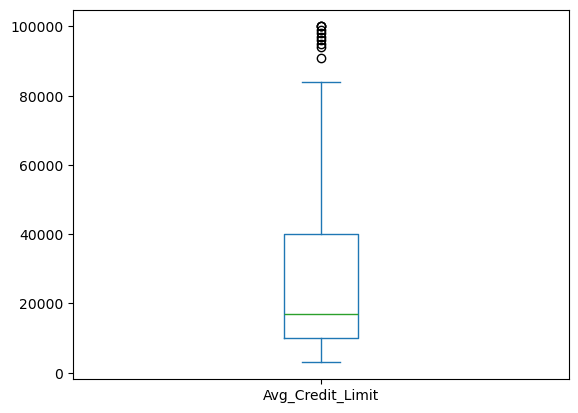

In [6]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    Q1 = data_frame[kolom_outlier].quantile(0.25)
    Q3 = data_frame[kolom_outlier].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    clean_data = data_frame[(data_frame[kolom_outlier] >= lower_bound) & (data_frame[kolom_outlier] <= upper_bound)]
    
    return clean_data

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')


  File "c:\anac\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\anac\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\anac\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\anac\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


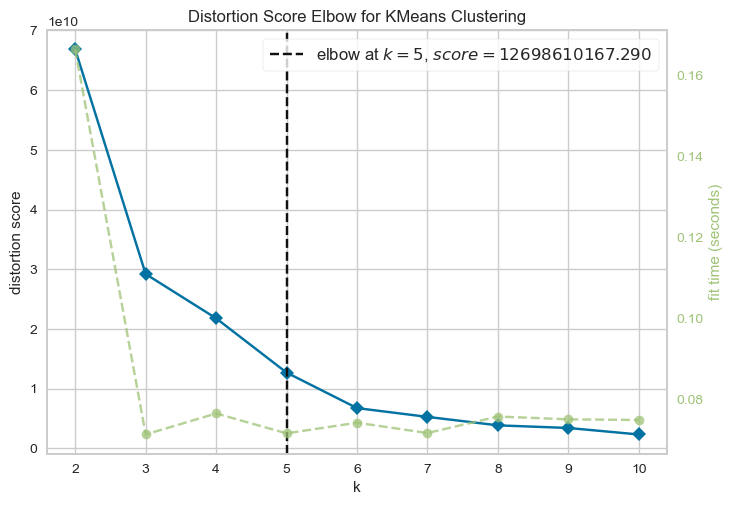

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=4)
vis = KElbowVisualizer(kMeansC,k=(2,11))
#xx = data yang sudah bersih
# vis.fit(xx)
vis.fit(data_bersih)
vis.show()

Silhouette Score K-Means for 2 clusters: 0.725419864297329
Silhouette Score K-Means for 3 clusters: 0.7077486724123684
Silhouette Score K-Means for 4 clusters: 0.5805626459091137
Silhouette Score K-Means for 5 clusters: 0.5987477194239668
Silhouette Score K-Means for 6 clusters: 0.6271962685685146
Silhouette Score K-Means for 7 clusters: 0.6255853552669711
Silhouette Score K-Means for 8 clusters: 0.6317192275649246
Silhouette Score K-Means for 9 clusters: 0.6205144820317909
Silhouette Score K-Means for 10 clusters: 0.6026680583209715


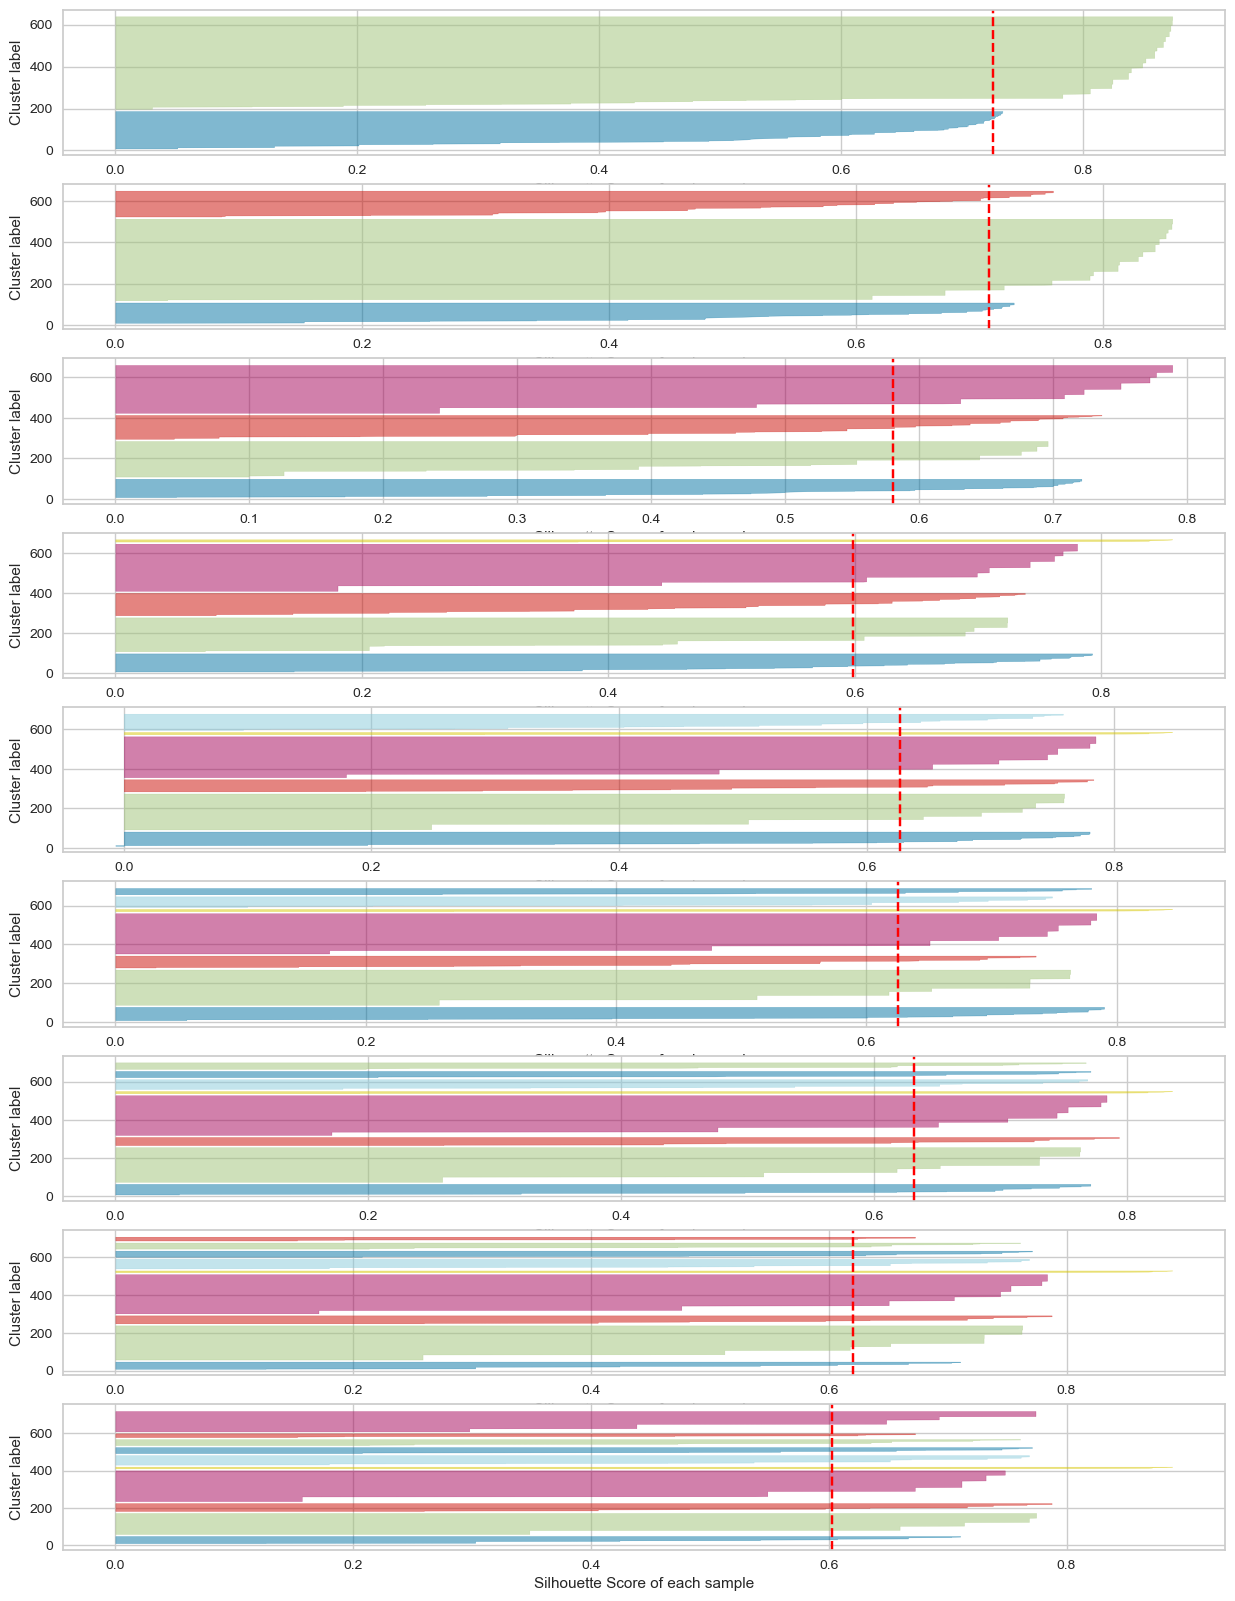

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

# Membuat plot untuk visualisasi Silhouette
fig, ax = plt.subplots(9, 1, figsize=(15, 20))

# Loop untuk menentukan jumlah cluster dari 2 hingga 10
for k in np.arange(2, 11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=4)
    
    # Menggunakan data yang sudah bersih untuk clustering
    KM_clusters = kMeansC.fit_predict(data_bersih[['Avg_Credit_Limit']])  # ganti kolom sesuai kebutuhan
    
    # Mencetak skor Silhouette untuk tiap jumlah cluster
    print("Silhouette Score K-Means for", k, "clusters:", silhouette_score(data_bersih[['Avg_Credit_Limit']], KM_clusters))
    
    # Visualisasi Silhouette Score menggunakan SilhouetteVisualizer
    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih[['Avg_Credit_Limit']])  # Memasukkan data ke dalam visualizer
    
    # Menambahkan label pada setiap plot silhouette
    ax[k-2].set(xlabel="Silhouette Score of each sample", ylabel="Cluster label")


In [11]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

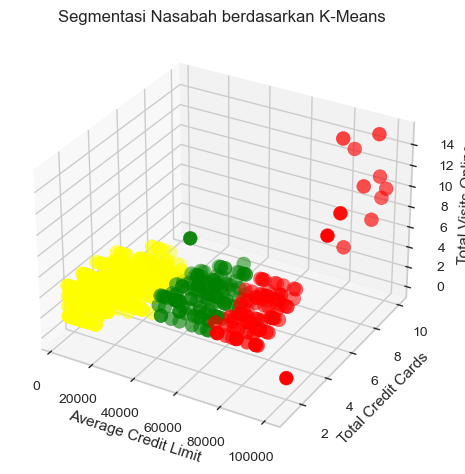

Silhouette Score K-Means: 0.708


In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=4)
K_clusters = kmeans.fit_predict(data_bersih) #melakuakn clustering pada data "xx" dan menyimpan hasil clustering

#membuat grafik 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

#menentukan warna untuk masing" cluster
#membuat scatter 3D menggunakan warna yang telah ditentukan dengan ukuran titik 100
cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5:'black', 6:'cyan'}

#xx = data yang sudah bersih
ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards' ], data_bersih['Total_visits_online' ],
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))


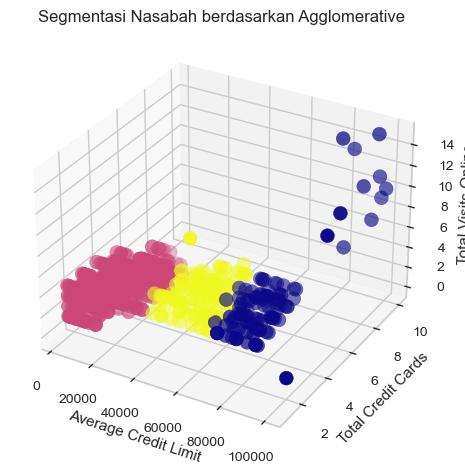

Silhouette Score K-Means: 0.705


In [25]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters))

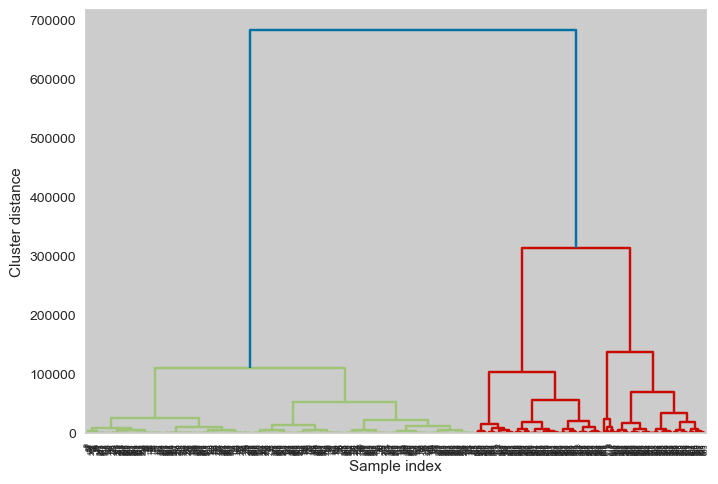

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_array = linkage(data_bersih, method = 'ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

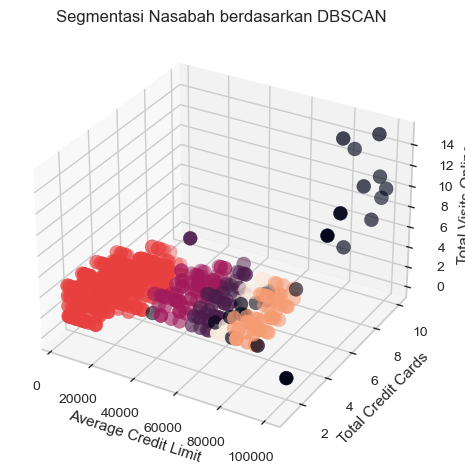

Silhouette Score K-Means: 0.657


In [28]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [29]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump((DBSC),r)


print("Model berhasil disimpan")


Model berhasil disimpan
